In [1]:
import pandas as pd
import numpy as np
import cobra

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

import sys
sys.path.append('../pycore/')
from utils import extract_details_from_rxnid

#### Pathway

In [2]:
df_pw = pd.read_excel('../scRBA_build_GAMS_model/input/GSM_pathway_assignment.xlsx')
df_pw.index = df_pw.rxnid.to_list()

#### Turnover numbers

In [3]:
df_invitro = pd.read_excel('../scRBA_build_GAMS_model/input/PARAMS_kapp_compiled.xlsx')
df_invitro.index = df_invitro.id.to_list()
excl = ['SPONT', 'TRANSPORT', 'UNKNOWN', 'median_kcat']
idx = [i for i in df_invitro.index if df_invitro.source[i] not in excl]
df_invitro = df_invitro.loc[idx,:]

In [4]:
with open('./kapps_in_vivo.txt') as f:
    texts = f.read().split('\n')[1:]
invivo = dict()
for i in texts:
    k,v = i.split('\t')
    invivo[k] = float(v)

In [5]:
rxns_common = set(invivo.keys()) & set(df_invitro.index)
rxns_common = sorted(list(rxns_common))

cols = ['rxnid', 'rxncore', 'subsystem_group', 'invitro', 'invivo']
df_data = pd.DataFrame(index=rxns_common, columns=cols)
df_data['rxnid'] = rxns_common

for rxn in rxns_common:
    _,rxncore,_,_ = extract_details_from_rxnid(rxn)
    df_data.loc[rxn, 'rxncore'] = rxncore
    df_data.loc[rxn, 'subsystem_group'] = df_pw.subsystem_group[rxncore]
    df_data.loc[rxn, 'invitro'] = df_invitro.loc[rxn, 'kapp (1/s)']
    df_data.loc[rxn, 'invivo'] = invivo[rxn]
    
for rxn in rxns_common:
    if df_data.subsystem_group[rxn] in ['Other biosynthetic metabolism', 'Other metabolism']:
        df_data.loc[rxn, 'subsystem_group'] = 'Other'

In [6]:
set(df_data.subsystem_group)

{'Amino acid metabolism',
 'Central metabolism',
 'Other',
 'RNA metabolism',
 'tRNA charging'}

#### Scatter plot

In [7]:
df_data[(df_data.subsystem_group == 'Central metabolism') & (df_data.invivo > 10**6)]

,rxnid,rxncore,subsystem_group,invitro,invivo
RXN-FECRq6_m_FWD-FECRq6CPLX,RXN-FECRq6_m_FWD-FECRq6CPLX,FECRq6_m,Central metabolism,110,1.70857e+06


In [41]:
groups = ['Central metabolism', 'Amino acid metabolism', 'RNA metabolism',
          'tRNA charging', 'Other']
for g in groups:
    print(g, df_data[df_data.subsystem_group == g].shape[0])

Central metabolism 61
Amino acid metabolism 98
RNA metabolism 49
tRNA charging 22
Other 166


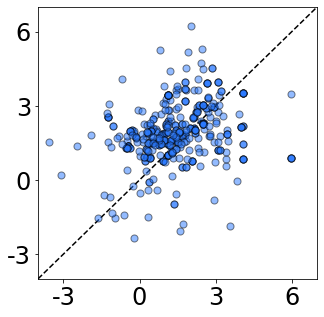

In [42]:
idx = df_data.index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_all.png', transparent=True, bbox_inches='tight')

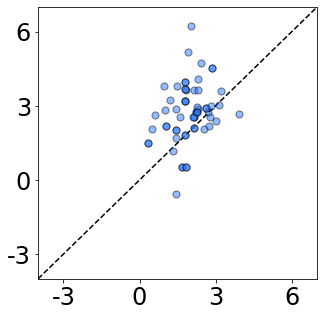

In [35]:
idx = df_data[df_data.subsystem_group == 'Central metabolism'].index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_central.png', transparent=True, bbox_inches='tight')

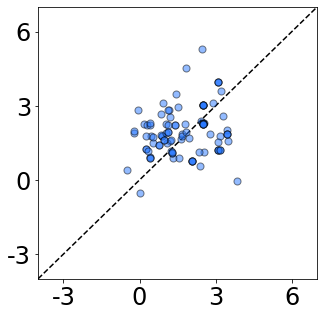

In [36]:
idx = df_data[df_data.subsystem_group == 'Amino acid metabolism'].index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_aminoacid.png', transparent=True, bbox_inches='tight')

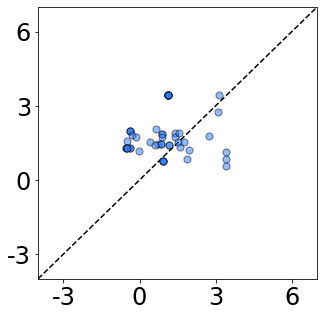

In [37]:
idx = df_data[df_data.subsystem_group == 'RNA metabolism'].index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_rna.png', transparent=True, bbox_inches='tight')

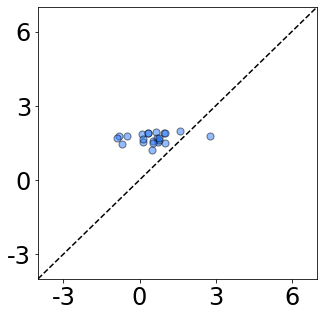

In [38]:
idx = df_data[df_data.subsystem_group == 'tRNA charging'].index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_trnacharging.png', transparent=True, bbox_inches='tight')

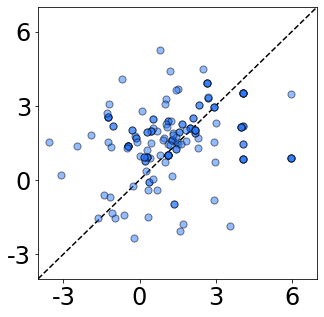

In [39]:
idx = df_data[df_data.subsystem_group == 'Other'].index
vitro_vals = df_data.invitro[idx]
vivo_vals = df_data.invivo[idx]

vitro_vals = np.log10(vitro_vals.to_list())
vivo_vals = np.log10(vivo_vals.to_list())

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2, color='#2979ff', edgecolor='k', s=50, alpha=0.5)

ticks = [-3, 0, 3, 6]; ticklabels = [str(i) for i in ticks]
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels, fontsize=24)
ax.set_xlim(-4,7);
ax.set_ylim(-4,7);

line = mlines.Line2D([-4,7], [-4,7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

plt.savefig('./figures/vivo_vs_vitro_other.png', transparent=True, bbox_inches='tight')

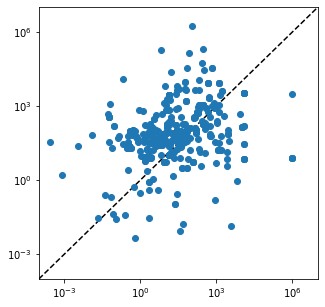

In [5]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(vitro_vals, vivo_vals, zorder=2)

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ticks = [-3, 0, 3, 6]
ticks = [10**i for i in ticks]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlim(10**-4, 10**7);
ax.set_ylim(10**-4, 10**7);

line = mlines.Line2D([10**-4, 10**7], [10**-4, 10**7], color='k', linestyle='--', zorder=1)
ax.add_line(line);

#### Working scripts

In [6]:
model = cobra.io.load_json_model('../scRBA_build_GAMS_model/input/GSM_y834_hvd_v6_rba.json')

Using license file /home/hvdinh16/Workspace/Softwares/gurobi910/linux64/gurobi.lic
Academic license - for non-commercial use only - expires 2022-08-08


In [7]:
rxns_pathway = dict()
for rxn in rxns_common:
    _,rxncore,_,_ = extract_details_from_rxnid(rxn)
    rxns_pathway[rxncore] = model.reactions.get_by_id(rxncore).subsystem

In [8]:
cols = ['rxnid', 'name', 'subsystem_group', 'subsystem']
rxns_model = sorted([rxn.id for rxn in model.reactions])
df_pathway = pd.DataFrame(columns=cols, index=rxns_model)
df_pathway['rxnid'] = df_pathway.index.to_list()

for rxn in df_pathway.index:
    df_pathway.loc[rxn, 'subsystem'] = model.reactions.get_by_id(rxn).subsystem
    df_pathway.loc[rxn, 'name'] = model.reactions.get_by_id(rxn).name

In [30]:
pathway_group = {
    'Central metabolism': ['Acetyl-CoA synthesis',
                           'Citric acid cycle',
                           'Glycolysis / Gluconeogenesis',
                           'Glyoxylate metabolism',
                           'Oxidative phosphorylation',
                           'Pentose phosphate pathway',
                           'Pyruvate metabolism',
                           'Methylglyoxal metabolism'],
    'Amino acid metabolism': ['Alanine, aspartate and glutamate metabolism',
                              'Arginine and proline metabolism',
                              'Cysteine and methionine metabolism',
                              'Glycine, serine and threonine metabolism',
                              'Histidine metabolism',
                              'Lysine metabolism',
                              'Phenylalanine, tyrosine and tryptophan metabolism',
                              'Valine, leucine and isoleucine metabolism',
                              'Valine, leucine and isoleucine biosynthesis',
                              'Vitamin B6 metabolism'],
    'RNA metabolism': ['Purine metabolism',
                       'Pyrimidine metabolism'],
    'Other biosynthetic metabolism': ['Biosynthesis of unsaturated fatty acids',
                                      'Cell wall biosynthesis',
                                      'Ergosterol biosynthesis',
                                      'Fatty acid biosynthesis',
                                      'Fatty acid elongation',
                                      'Folate metabolism',
                                      'Glycerophospholipid biosynthesis',
                                      'Glycerophospholipid metabolism',
                                      'Heme metabolism',
                                      'N-Glycan biosynthesis',
                                      'Nicotinate and nicotinamide metabolism',
                                      'Nitrogen metabolism',
                                      'Pantothenate and CoA biosynthesis',
                                      'Pentose and glucuronate interconversions',
                                      'Phospholipid biosynthesis',
                                      'Riboflavin metabolism',
                                      'Sphingolipid biosynthesis',
                                      'Sulfur metabolism',
                                      'Terpenoid backbone biosynthesis',
                                      'Thiamine metabolism',
                                      'Triacylglycerol biosynthesis',
                                      'Biotin metabolism',
                                      'Cofactors and prosthetic groups biosynthesis',
                                      'GPI biosynthesis',
                                      'Glycerolipid metabolism',
                                      'O-Glycan biosynthesis',
                                      'Sphingolipid metabolism',
                                      'Ubiquinone and other terpenoid-quinone biosynthesis',
                                      'Ubiquinone biosynthesis'],
    'tRNA charging': ['Aminoacyl-tRNA biosynthesis'],
    'Other metabolism': ['Detoxification',
                         'Amino sugar and nucleotide sugar metabolism',
                         'Fatty acid degradation',
                         'Fructose and mannose metabolism',
                         'Phosphonate and phosphinate metabolism',
                         'Starch and sucrose metabolism',
                         'Synthesis and degradation of ketone bodies',
                         'Unassigned', '',
                         'Alternative carbon metabolism',
                         'Arachidonic acid metabolism',
                         'Butanoate metabolism',
                         'C5-Branched dibasic acid metabolism',
                         'Galactose metabolism',
                         'Glutathione metabolism',
                         'Inositol phosphate metabolism',
                         'Lipid metabolism',
                         'Nucleotide metabolism',
                         'Propanoate metabolism',
                         'Steroid biosynthesis',
                         'Taurine and hypotaurine metabolism',
                         'Triacylglycerol degradation',
                         'Tryptophan metabolism',
                         'beta-Alanine metabolism'],
    'Excluded': ['Transport', 'Exchange', 'Pseudoreaction']
}

pathway_group_rev = {}
for k,vs in pathway_group.items():
    for v in vs:
        pathway_group_rev[v] = k

In [31]:
for i in df_pathway.index:
    ss = df_pathway.subsystem[i]
    if ss in pathway_group_rev.keys():
        df_pathway.loc[i, 'subsystem_group'] = pathway_group_rev[ss]

In [34]:
df_pathway

,rxnid,name,subsystem_group,subsystem
12AMANTF_g,12AMANTF_g,"alpha 1,2-mannosyltransferase",Other biosynthetic metabolism,N-Glycan biosynthesis
13BDGLUCANt_c_en,13BDGLUCANt_c_en,(1->3)-beta-D-glucan transport,Excluded,Transport
13BGH_e,13BGH_e,"exo-1,3-beta-glucan glucohydrase",Other metabolism,Starch and sucrose metabolism
13GS_c,13GS_c,"1,3-beta-glucan synthase",Other metabolism,Starch and sucrose metabolism
14BMANTF_c,14BMANTF_c,"beta-1,4 mannosyltransferase",Other biosynthetic metabolism,N-Glycan biosynthesis
...,...,...,...,...
compFALPD_rm,compFALPD_rm,Composition of fatty acid (from lipid),Excluded,Pseudoreaction
lumpFACS160_c,lumpFACS160_c,fatty-acyl-CoA synthase (n-C16:0CoA),Other biosynthetic metabolism,Fatty acid biosynthesis
lumpFACS180_c,lumpFACS180_c,fatty-acyl-CoA synthase (n-C18:0CoA),Other biosynthetic metabolism,Fatty acid biosynthesis
r_4323_m,r_4323_m,protein N6-(octanoyl)lysine:sulfur sulfurtrans...,Other metabolism,Unassigned


In [35]:
df_pathway.to_excel('./GSM_pathway_assignment_frompy.xlsx', index=None)

In [26]:
len(set(invivo.keys()) - set(df_invitro.index))

65

In [27]:
len(set(invivo.keys()) & set(df_invitro.index))

396

In [28]:
df_invitro.head()

,id,kapp (1/s),source
RXN-BTDDH_c_FWD-YAL060W,RXN-BTDDH_c_FWD-YAL060W,1633.333333,Chen2021_invitro_SABIORK
RXN-BTDDH_c_REV-YAL060W,RXN-BTDDH_c_REV-YAL060W,1633.333333,Chen2021_invitro_SABIORK
RXN-13GS_c_FWD-GSC2RHO1,RXN-13GS_c_FWD-GSC2RHO1,13.333547,Oftadeh2021_invitro_GECKO
RXN-13GS_c_FWD-GSC1RHO1,RXN-13GS_c_FWD-GSC1RHO1,13.333547,Oftadeh2021_invitro_GECKO
RXN-PRMICI_c_FWD-YIL020C,RXN-PRMICI_c_FWD-YIL020C,31.999836,Oftadeh2021_invitro_GECKO


In [32]:
set(df_invitro.source)

{'Chen2021_invitro_BRENDA',
 'Chen2021_invitro_SA',
 'Chen2021_invitro_SABIORK',
 'Chen2021_invitro_literature',
 'Oftadeh2021_invitro_GECKO',
 'manual_curation'}